# **<span style='background :yellow' >Numpy Digital Image Processing</span>**

 ### Major: Computer Science and Technology

## Task Statement:

1. Create a Numpy array from an Image.

2. Display the color plane of the image  respectively and convert this image to a grayscale image.

3. Perform some operations like blurring and sharpening.

4. Using Numpy array functions to find the edges of objects in the picture.

### 1. Create a Numpy array from an Image

<class 'numpy.ndarray'>


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,  33,  76],
        [  6,  33,  76],
        [  6,  34,  74]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,  34,  74],
        [  6,  34,  74],
        [  6,  34,  74]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,  35,  73],
        [  5,  35,  73],
        [  5,  35,  73]],

       ...,

       [[  2,  27,  34],
        [  3,  28,  35],
        [  4,  27,  35],
        ...,
        [ 82,  97, 130],
        [ 82,  96, 131],
        [ 83,  97, 132]],

       [[  2,  27,  34],
        [  2,  27,  34],
        [  3,  26,  34],
        ...,
        [ 82,  97, 130],
        [ 82,  97, 130],
        [ 83,  98, 131]],

       [[  1,  26,  33],
        [  1,  26,  33],
        [  3,  25,  36],
        ...,
        [ 82,  97, 128],
        [ 82,  97, 130],
        [ 83,  98, 131]]

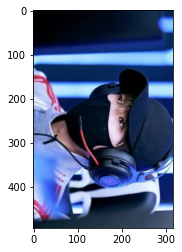

In [2]:
# Import all the necessary libraries.
import PIL
import warnings
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

#Read the image and store it into the variable panda.
panda = Image.open('kingAvatar.jpg') 

#Convert the image into an array.
pandas = np.array(panda) 

#Check if it is correctly converted to an array.
print(type(pandas)) 

#Display the image stored in the form of an array.
plt.imshow(pandas)

#Display the values of the stored array.
pandas


### 2. Display the color plane of the image respectively and convert this image to a grayscale image.
#### 2.1. Display the color plane of the image  respectively

In [3]:
#Create a zero matrix of order same as original image array (same dimension and class 'uint8').
R = np.zeros(pandas.shape, dtype='uint8')
G = np.zeros(pandas.shape, dtype='uint8')
B = np.zeros(pandas.shape, dtype='uint8')

#Store each plane content or data of the image to the corresponding plane.
R[:, :, 0] = pandas[:, :, 0]
G[:, :, 1] = pandas[:, :, 1]
B[:, :, 2] = pandas[:, :, 2]

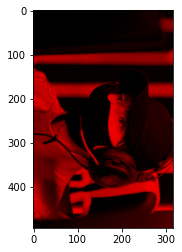

In [4]:
#Display the red plane image
plt.imshow(R)

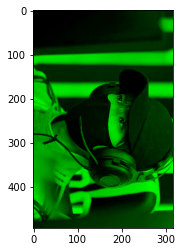

In [5]:
#Display the green plane image
plt.imshow(G)

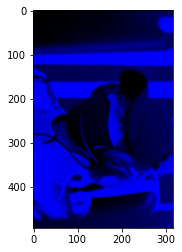

In [6]:
#Display the blue plane image
plt.imshow(B)

#### 2.2. Convert the image into grayscale

In [7]:
#Define a function to convert a color image to a grayscale image by using the formula 
#gray = R*0.299 + G*0.587 + B*0.114
def colored2grayscale(colored_image):
    
    #Extract the three channels
    R, G, B = colored_image[:,:,0], colored_image[:,:,1],colored_image[:,:,2]
    
    #Apply the formula
    grayscale = 0.299 * R + 0.587 * G + 0.114 * B

    return grayscale

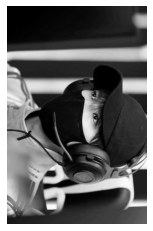

In [8]:
#Call the function to do the conversion
first_conversion = colored2grayscale(pandas)

#Display the converted image
plt.imshow(first_conversion, cmap='gray')

#Save the converted image
plt.axis('off')
plt.savefig('grayscale_image.jpg', bbox_inches='tight',pad_inches = 0)

## 3. Perform some operations like blurring and sharpening:

Image sharpening / enhancement process consists of a collection of techniques whose purpose is to improve image visual appearance and to highlight or recover certain details of the image for conducting an appropriate analysis by a human or a machine.

In This part some methods will be discovered to improve image quality and facilitate the edge detection.

In [9]:
gray_image = Image.open("grayscale_image.jpg")

#Use rotate() method on the gray image object to adjust its position by angle.
angle = 90
gray_image = gray_image.rotate(angle, expand=True)

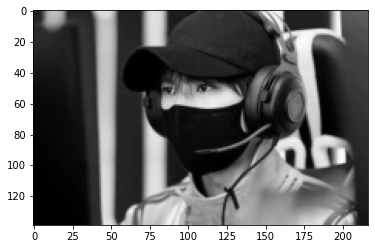

In [10]:
plt.imshow(gray_image)

In [11]:
#Using the Brightness() method here with a factor of 1.2 will give 
#a brightened image in contrast of a factor inferior to 1.
gray_brightness = ImageEnhance.Brightness(gray_image)
gray_brightness = gray_brightness.enhance(1.2)

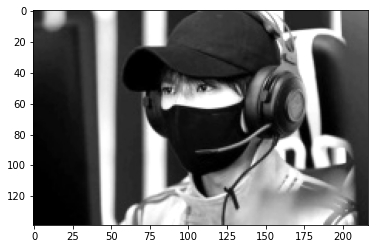

In [12]:
plt.imshow(gray_brightness)

In Digital image processing, blurring is used to make an image smooth in which edges are not observed.

Let us discover it here:

In [13]:
#Using Sharpness() method here with a factor of 0.02 will give a blurred image.
enhancer = ImageEnhance.Sharpness(gray_brightness)
gray_panda = enhancer.enhance(0.02)

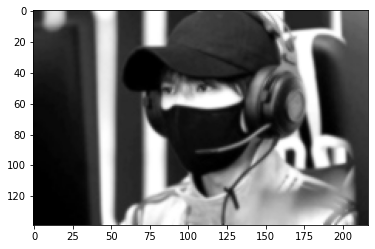

In [14]:
plt.imshow(gray_panda)

In [15]:
#Using Sharpness() method here with a factor of 2 will give a sharpened image.
gray_panda = enhancer.enhance(2.4)

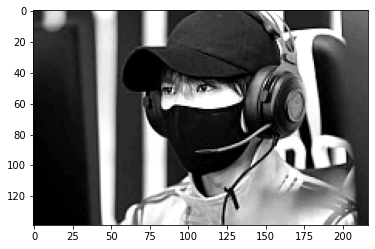

In [16]:
plt.imshow(gray_panda)

## 4. Using Numpy array functions to find the edges of objects in the picture

An edge is a place of rapid change in the image intensity function.
In This homework a Sobel filter will be used and this operator is a specific type of 2D derivative mask which is efficient in detecting the edges in an image. 

The following two masks will be used.

<img align="center" width="300" height="300" src='https://www.projectrhea.org/rhea/images/thumb/9/91/XY_Kernels.png/750px-XY_Kernels.png'/>

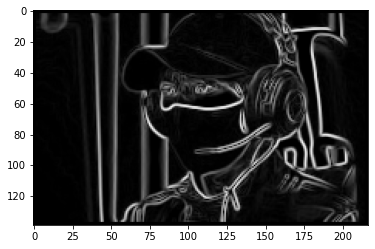

In [17]:
#Read and store the converted image into the variable gray_panda and convert it into an array
gray_pandas = np.array(gray_panda) 

#Define the two masks will be used
vertical_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
horizontal_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#Define "edges" variable where we are going to fill values based on what we think is the edges of the image
edges = np.zeros(gray_pandas.shape)

#Loop over every single pixel in the image
for i in range(2, gray_pandas.shape[0]-2):
    for j in range(2, gray_pandas.shape[1]-2): 
        
        #for every pixel that we can create a box around we go ahead and creat it 
        #then multiply it by the vertical filter and do the normalization.
        vertical_score = (gray_pandas[i-1:i+2, j-1:j+2, 0]*vertical_filter).sum()
        
        #Same argument can be said for the horizontal filter.
        horizontal_score = (gray_pandas[i-1:i+2, j-1:j+2, 0]*horizontal_filter).sum()
     
        #After getting both vertical and horizontal scores we apply kind of averaging operation
        #which is going to give both vertical and horizontal edges.
        edges[i, j] = [(vertical_score**2 + horizontal_score**2)**.5]*3

edges = edges/edges.max()

plt.imshow(edges)